In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use("fivethirtyeight")
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
#UTC to +00.00
datatype={'key':'object','fare_amount':"float64","pickup_datetime":"object",
         "pickup_longitude":"float64","pickup_latitude":"float64","dropoff_longitude":"float64",
         "dropoff_latitude":"float64","passenger_count":"int64"
         }
df=pd.read_csv('train.csv',low_memory=False,nrows=10**5,dtype=datatype,parse_dates=['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.shape

(50000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  float64            
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [7]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
#no null values
import calendar
df['date']=df['pickup_datetime'].dt.date
df['day']=df['pickup_datetime'].apply(lambda m:m.day)
df['hour']=df['pickup_datetime'].apply(lambda m:m.hour)
df['week']=df['pickup_datetime'].apply(lambda m:calendar.day_name[m.weekday()])
df['month']=df['pickup_datetime'].apply(lambda m:m.month)
df['year']=df['pickup_datetime'].apply(lambda m:m.year)

In [9]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,day,hour,week,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [10]:
df.shape

(50000, 14)

In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


<Axes: xlabel='fare_amount'>

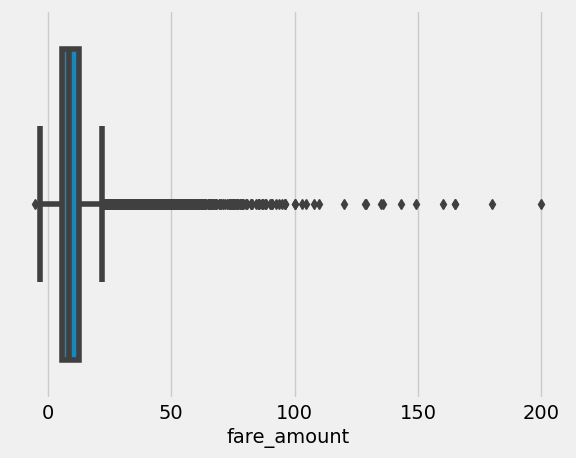

In [12]:
#min fare amt negative outliers are present
sns.boxplot(x='fare_amount',data=df)

In [13]:
df=df[((df['pickup_longitude']> -78)&
      (df['pickup_longitude']<-70))&
      ((df['dropoff_longitude']>-78)&
      (df['dropoff_longitude']<-70))&
      ((df['pickup_latitude']>37)&
      (df['pickup_latitude']<45))&
      ((df['dropoff_latitude']>37)&
      (df['dropoff_latitude']<45))&
      (df['passenger_count']>0)&
      (df['fare_amount']>=2.5)]

In [14]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.664139,13.482757,6.276233,2011.739770
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659466,6.504260,3.461211,1.867738
min,2.500000,-75.423848,38.754215,-75.354559,39.604972,1.00000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000


array([[<Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'pickup_datetime'}>,
        <Axes: title={'center': 'pickup_longitude'}>],
       [<Axes: title={'center': 'pickup_latitude'}>,
        <Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

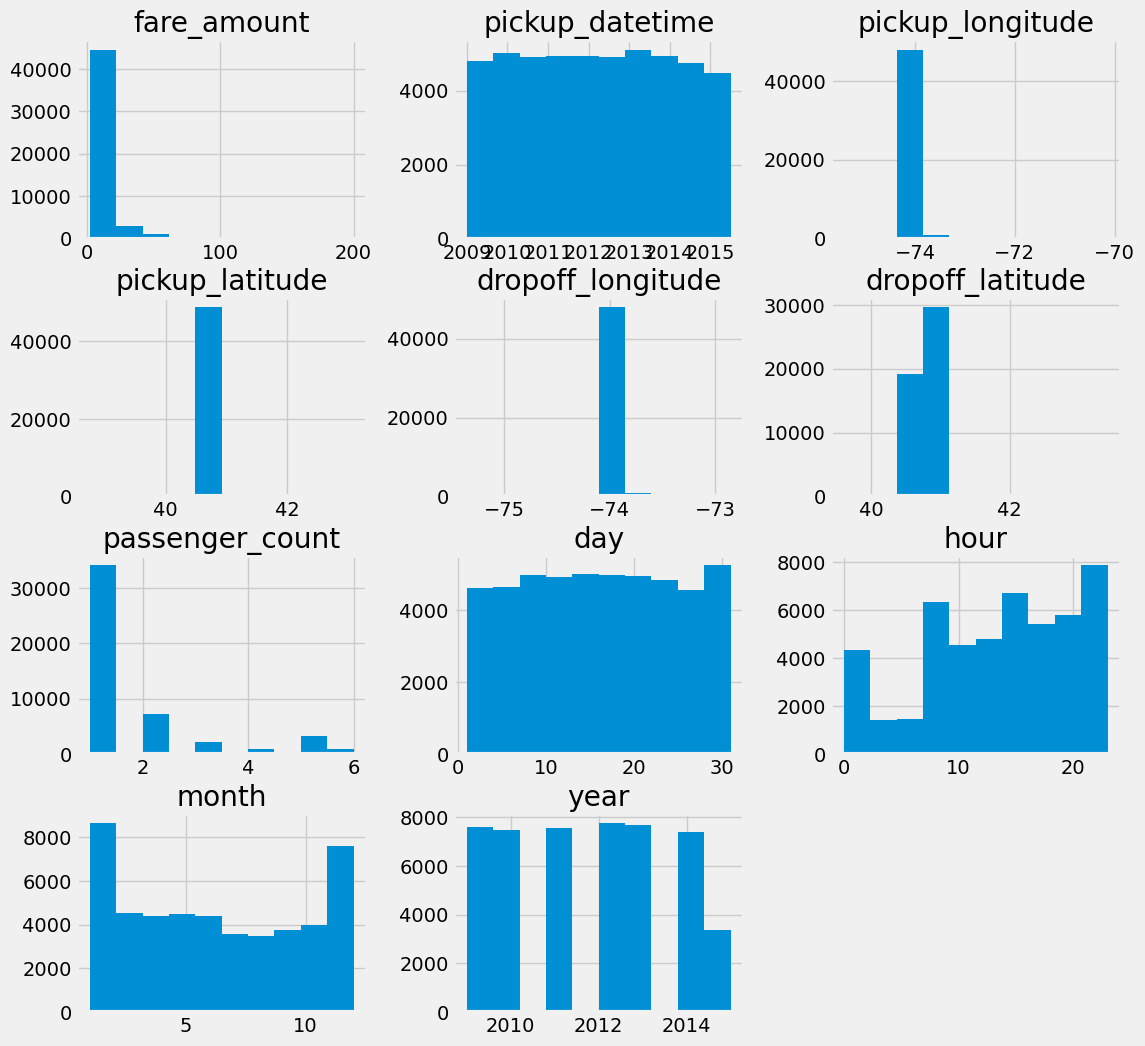

In [15]:
df.hist(figsize=(12,12))

In [16]:
df['passenger_count'].value_counts()

1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: passenger_count, dtype: int64

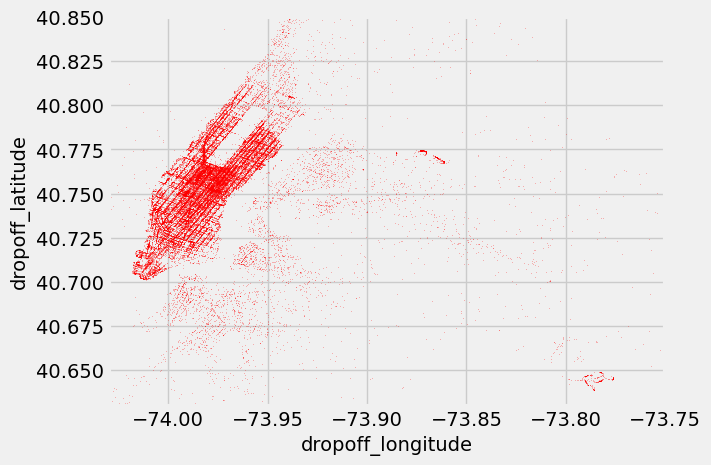

In [17]:
#for drop off

longitude=(-74.03,-73.75)
latitude=(40.63,40.85)
df.plot(kind='scatter',x="dropoff_longitude",y="dropoff_latitude", color="red",s=.02,alpha=.6)
plt.ylim(latitude)
plt.xlim(longitude)
plt.show()

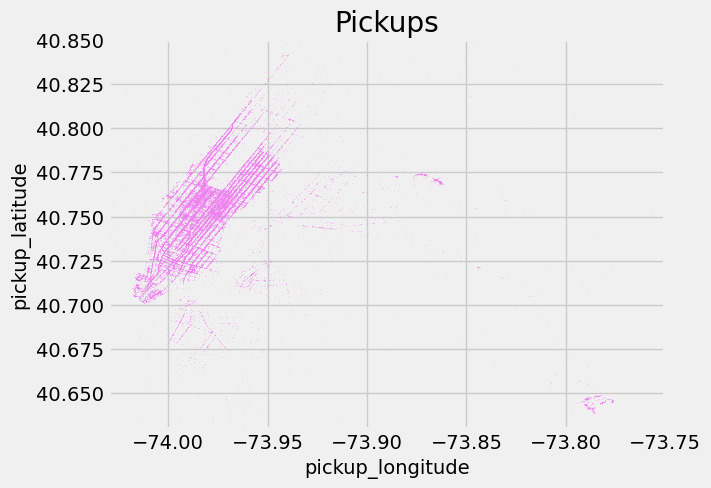

In [18]:
#for pickup
lo=(-74.03,-73.75)
la=(40.63,40.85)
df.plot(kind='scatter',x="pickup_longitude",y="pickup_latitude",
       color="violet",s=.02,alpha=.6)
plt.title("Pickups")
plt.ylim(la)
plt.xlim(lo)
plt.show()

In [19]:
def distance(lat1,lon1,lat2,lon2):
    p=0.017453292519943295 #Pi/180
    a=0.5-np.cos((lat2-lat1)*p)/2+ np.cos(lat1 * p)*np.cos(lat2 * p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 *np.arcsin(np.sqrt(a))
#miles
df["miles"]=distance(df.pickup_latitude,df.pickup_longitude,
                              df.dropoff_latitude,df.dropoff_longitude)

In [20]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,day,hour,week,month,year,miles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [21]:
df.shape

(48803, 15)

In [22]:
df1=df.copy()
df1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,day,hour,week,month,year,miles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [23]:
Variables={"Monday":1,"Tuesday":2,"Wednesday":5,"Thursday":3,"Friday":7,"Saturday":4,"Sunday":6}
year={2012: 1, 2013: 2, 2011: 3, 2009: 4, 2010: 5, 2014: 6, 2015: 7}
df1["year"]=df1["year"].map(year)
df1["week"]=df1["week"].map(Variables)
df1.drop(["pickup_datetime","date","key"],axis=1,inplace=True)
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,week,month,year,miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


In [24]:
x=df1.drop(["fare_amount"],axis=1)
y=df1[["fare_amount"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [25]:
#linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [26]:
model.score(xtrain,ytrain)

0.45623631799701303

In [27]:
model.score(xtest,ytest)

0.5192468028585215

In [28]:
model1=RandomForestRegressor()
model1.fit(xtrain,ytrain)

RandomForestRegressor()

In [29]:
model1.score(xtrain,ytrain)

0.9698401871855148

In [30]:
model1.score(xtest,ytest)

0.8222317321298579

In [31]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [32]:
model2.score(xtrain,ytrain)

1.0

In [33]:
model2.score(xtest,ytest)

0.6461692757300072

In [34]:
#random forest best
Pickup_Coordinates=str(input("Enter Pickup Coordinates : "))
Drop_off_Coordinates=str(input("Enter Drop-off Coordinates : "))

pickup_latitude=float(Pickup_Coordinates.split(",")[0])
pickup_longitude=float(Pickup_Coordinates.split(",")[1])

drop_off_latitude=float(Drop_off_Coordinates.split(",")[0])
drop_off_longitude=float(Drop_off_Coordinates.split(",")[1])

Enter_Date=input("Enter Date (DD/MM/YEAR) : ")

passenger_count=int(input("Enter number of Passengers : "))

pickup_day=int(Enter_Date.split('/')[0])
pickup_hour=int(input("Enter Hour : "))

pickup_day_of_week=int(input("Enter Week : "))

pickup_month=int(Enter_Date.split('/')[1])
pickup_year=int(Enter_Date.split('/')[2])

distance_miles=distance(pickup_latitude,pickup_longitude,drop_off_latitude,drop_off_longitude)
my_array=np.array([pickup_longitude, pickup_latitude, drop_off_longitude,
                   drop_off_latitude,passenger_count, pickup_day,pickup_hour,
                   pickup_day_of_week, pickup_month, pickup_year, distance_miles])
print("Fare Amount ($)  : ",model1.predict(my_array.reshape(1,-1)))

Enter Pickup Coordinates : 40.721319,-73.844311
Enter Drop-off Coordinates : 40.712278,-73.84161
Enter Date (DD/MM/YEAR) : 15/06/2009
Enter number of Passengers : 1
Enter Hour : 17
Enter Week : 1
Fare Amount ($)  :  [5.422]
